In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### SSR & R_squared

In [4]:
x_mean = 0
x_sum = 0
for i in range(len(x)):
    x_sum = x[i] + x_sum
x_mean = x_sum / (len(x))

In [5]:
y_mean = 0
y_sum = 0
for i in range(len(y)):
    y_sum = y[i] + y_sum
y_mean = y_sum / (len(y))

In [6]:
print(x_mean, y_mean)

4.5 6.5


In [7]:
upper_val_of_b1 = 0
lower_val_of_b1 = 0
for i in range(len(x)):
    upper_val_of_b1 = (x[i] - x_mean) * (y[i] - y_mean) + upper_val_of_b1
    lower_val_of_b1 = (x[i] - x_mean)**2 + lower_val_of_b1

In [8]:
B1 = upper_val_of_b1 / lower_val_of_b1

In [9]:
B0 = y_mean - B1 * x_mean

In [10]:
SSR = 0
for i in range(len(x)):
    SSR += (y[i] - (B0 + B1 * x[i]))**2

In [14]:
print("sum of squared residuals (SSR): ", SSR)

sum of squared residuals (SSR):  5.624242424242421


In [13]:
SST = 0
for i in range(len(y)):
    SST += (y[i] - y_mean)**2
print(SST)

118.5


In [17]:
SSE = SST - SSR
print("sum of squared estimate of errors (SSE): ", SSE)

sum of squared estimate of errors (SSE):  112.87575757575758


In [16]:
R_squared = SSR / SST
print(R_squared)

0.047461961386012


In [19]:
def plot_regression_line(x, y, b0, b1):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b0 + b1 * x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

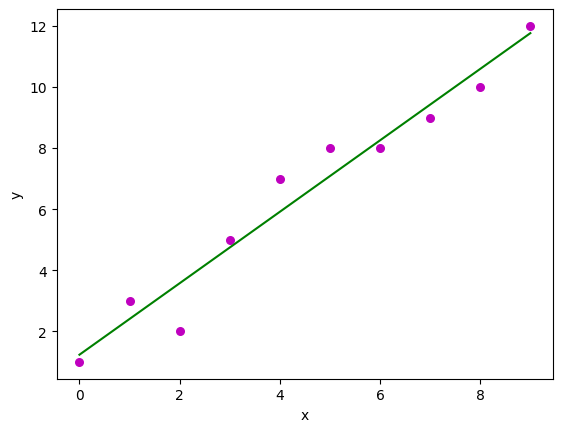

In [21]:
plot_regression_line(x, y, B0, B1)

### Full Batch Gradient Descent

In [18]:
def full_batch_gradient_descent(x, y, learning_rate=0.01, epochs=1000, tolerance=1e-6):
    n = len(x)
    # Initialize coefficients
    b_0 = 0
    b_1 = 0
    prev_loss = float('inf')

    for epoch in range(epochs):
        # Compute predictions
        y_pred = b_0 + b_1 * x

        # Compute gradients
        gradient_b0 = (-2/n) * np.sum(y - y_pred)
        gradient_b1 = (-2/n) * np.sum((y - y_pred) * x)

        # Update coefficients
        b_0 -= learning_rate * gradient_b0
        b_1 -= learning_rate * gradient_b1

        # Compute loss
        loss = np.sum((y - y_pred)**2)

        # Check for convergence
        if abs(prev_loss - loss) < tolerance:
            break

        prev_loss = loss

    return b_0, b_1, loss

In [22]:
B0_new, B1_new, loss = full_batch_gradient_descent(x, y)

In [24]:
print(B0, B1)
print(B0_new, B1_new)

1.2363636363636363 1.1696969696969697
1.230898466943318 1.170568526128318


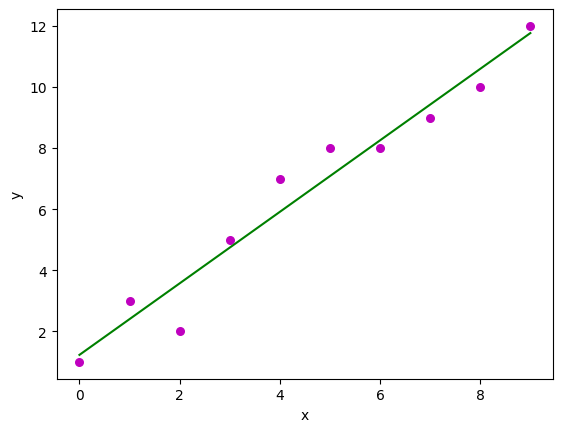

In [23]:
plot_regression_line(x, y, B0_new, B1_new)

In [25]:
SSR_FullGD = 0
for i in range(len(x)):
    SSR_FullGD += (y[i] - (B0_new + B1_new * x[i]))**2

In [27]:
R_squared_FullGD = SSR_FullGD / SST
print("Comparing R_rquared values:")
print(R_squared)
print(R_squared_FullGD)

Comparing R_rquared values:
0.047461961386012
0.047462691187468035


In [31]:
SSE_FullGD = SST - SSR_FullGD
print(SSE, SSE_FullGD)

112.87575757575758 112.87567109428504


### Stochastic Gradient Descent

In [28]:
def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000, tolerance=1e-6):
    n = len(x)
    # Initialize coefficients
    b0 = 0
    b1 = 0
    prev_loss = float('inf')

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(n):
            # Compute prediction for a single data point
            y_pred = b0 + b1*x_shuffled[i]

            # Compute gradients
            gradient_b0 = -2 * (y_shuffled[i] - y_pred)
            gradient_b1 = -2 * (y_shuffled[i] - y_pred) * x_shuffled[i]

            # Update coefficients
            b0 -= learning_rate * gradient_b0
            b1 -= learning_rate * gradient_b1

        # Compute loss
        y_pred = b0 + b1*x
        loss = np.sum((y - y_pred)**2)

        # Check for convergence
        if abs(prev_loss - loss) < tolerance:
            break

        prev_loss = loss

    return b0, b1, loss

In [29]:
B0_SGD, B1_SGD, loss_SGD = stochastic_gradient_descent(x, y)
print(B0_SGD, B1_SGD)

1.2742735741156586 1.2285735217041969


In [30]:
SSR_SGD = 0
for i in range(len(x)):
    SSR_SGD += (y[i] - (B0_SGD + B1_SGD * x[i]))**2

In [32]:
R_squared_SGD = SSR_SGD / SST
print("Comparing R_rquared values:")
print(R_squared)
print(R_squared_SGD)

Comparing R_rquared values:
0.047461961386012
0.05761546348715919


In [33]:
SSE_SGD = SST - SSR_SGD
print(SSE, SSE_SGD)

112.87575757575758 111.67256757677164


In [34]:
print("R_squared and SSE values: ")
print("Normal: ", R_squared, "   ", SSE)
print("Full Gradient Descent: ", R_squared_FullGD, "   ", SSE_FullGD)
print("Stochastic Gradient Descent: ", R_squared_SGD, "   ", SSE_SGD)

R_squared and SSE values: 
Normal:  0.047461961386012     112.87575757575758
Full Gradient Descent:  0.047462691187468035     112.87567109428504
Stochastic Gradient Descent:  0.05761546348715919     111.67256757677164
